In [ ]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import time 

def plot_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label="Validation Loss")
  ax.plot(x,ty,'r',label="Training Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


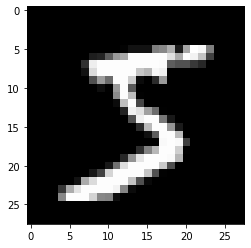

5


In [ ]:
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[0])

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
Y_train=utils.to_categorical(y_train,10)
Y_test=utils.to_categorical(y_test,10)

In [ ]:
print("Before one hot encoding")
print(y_train[0])
print("After one hot encoding")
print(Y_train[0])

Before one hot encoding
5
After one hot encoding
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2> Softmax Classifier </h2>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


input_dim=X_train.shape[1]
output_dim=10
batch_size=128
epoch=20


Model=Sequential()
Model.add(Dense(output_dim,input_dim=input_dim,activation="softmax"))
Model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
history=Model.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_test,Y_test))


Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.7069 - accuracy: 0.5119 - val_loss: 0.8182 - val_accuracy: 0.8333
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7714 - accuracy: 0.8355 - val_loss: 0.6089 - val_accuracy: 0.8658
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6094 - accuracy: 0.8583 - val_loss: 0.5262 - val_accuracy: 0.8753
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.8677 - val_loss: 0.4803 - val_accuracy: 0.8816
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4906 - accuracy: 0.8783 - val_loss: 0.4505 - val_accuracy: 0.8866
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4680 - accuracy: 0.8790 - val_loss: 0.4292 - val_accuracy: 0.8901
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4454 - accuracy: 0.8837 - val_loss: 0.4129 - val_accuracy: 0.8928
Epoch 

Test Score 0.33603399991989136
Test Accuracy 0.9088000059127808


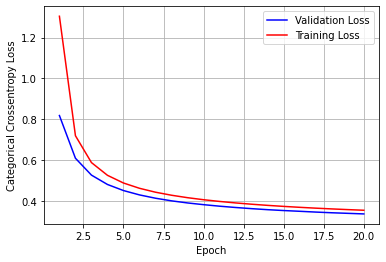

In [ ]:
score=Model.evaluate(X_test,Y_test,verbose=0)
print("Test Score",score[0])
print("Test Accuracy",score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Categorical Crossentropy Loss")
x=list(range(1,epoch+1))

vy=history.history["val_loss"]
ty=history.history["loss"]
plot_dynamic(x,vy,ty,ax)

<h2> MLP+Sigmoid+SGD(INPUT-512-128-10)</h2>

In [ ]:
model_sigmoid=Sequential()
model_sigmoid.add(Dense(512,activation="sigmoid",input_shape=(input_dim,)))
model_sigmoid.add(Dense(128,activation="sigmoid"))
model_sigmoid.add(Dense(output_dim,activation="softmax"))
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_sigmoid.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
history_sigmoid=model_sigmoid.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 2.2932 - accuracy: 0.1841 - val_loss: 2.2156 - val_accuracy: 0.3221
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 2.1963 - accuracy: 0.4430 - val_loss: 2.1193 - val_accuracy: 0.4402
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 2.0918 - accuracy: 0.5586 - val_loss: 1.9774 - val_accuracy: 0.6652
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 1.9383 - accuracy: 0.6492 - val_loss: 1.7787 - val_accuracy: 0.6812
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 1.7318 - accuracy: 0.6800 - val_loss: 1.5371 - val_accuracy: 0.7033
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 1.4911 - accuracy: 0.7130 - val_loss: 1.3010 - val_accuracy: 0.7465
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 1.2635 - accuracy: 0.7410 - val_loss: 1.1109 - val_accuracy: 0.7666
Epoch 

Test Score 0.4650806784629822
Test Accuracy 0.8756999969482422


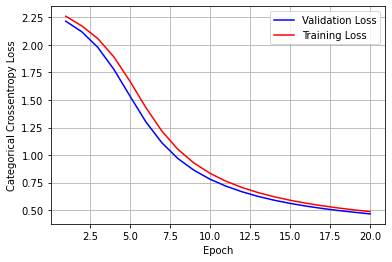

In [ ]:
score_sigmoid=model_sigmoid.evaluate(X_test,Y_test,verbose=0)
print("Test Score",score_sigmoid[0])
print("Test Accuracy",score_sigmoid[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Categorical Crossentropy Loss")
x=list(range(1,epoch+1))

vy=history_sigmoid.history["val_loss"]
ty=history_sigmoid.history["loss"]
plot_dynamic(x,vy,ty,ax)

Text(0.5, 0, 'Output Layer')

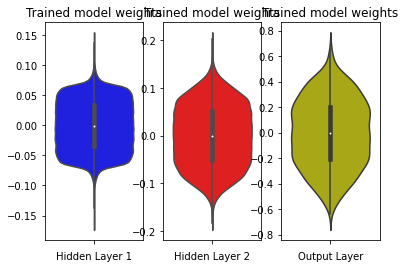

In [ ]:
W_after=model_sigmoid.get_weights()

h1_w=W_after[0].flatten().reshape(-1,1)
h2_w=W_after[2].flatten().reshape(-1,1)
out_w=W_after[4].flatten().reshape(-1,1)

fig=plt.figure()
plt.title("Weight Matrices After Model Trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y=h1_w,color="b")
plt.xlabel("Hidden Layer 1")

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y=h2_w,color="r")
plt.xlabel("Hidden Layer 2")

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")



<h2> MLP+Sigmoid+ADAM </h2>

In [ ]:
model_sigmoid.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_sigmoid_adam=model_sigmoid.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3854 - accuracy: 0.8879 - val_loss: 0.2705 - val_accuracy: 0.9194
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2390 - accuracy: 0.9296 - val_loss: 0.1956 - val_accuracy: 0.9406
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1763 - accuracy: 0.9481 - val_loss: 0.1502 - val_accuracy: 0.9560
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1376 - accuracy: 0.9596 - val_loss: 0.1207 - val_accuracy: 0.9639
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1066 - accuracy: 0.9693 - val_loss: 0.1209 - val_accuracy: 0.9638
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0860 - accuracy: 0.9749 - val_loss: 0.0910 - val_accuracy: 0.9727
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0681 - accuracy: 0.9801 - val_loss: 0.0895 - val_accuracy: 0.9709

Test Score 0.07516637444496155
Test Accuracy 0.9793000221252441


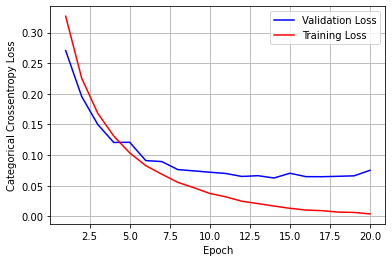

In [ ]:
score_sigmoid_adam=model_sigmoid.evaluate(X_test,Y_test,verbose=0)
print("Test Score",score_sigmoid_adam[0])
print("Test Accuracy",score_sigmoid_adam[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Categorical Crossentropy Loss")
x=list(range(1,epoch+1))

vy=history_sigmoid_adam.history["val_loss"]
ty=history_sigmoid_adam.history["loss"]
plot_dynamic(x,vy,ty,ax)

Text(0.5, 0, 'Output Layer')

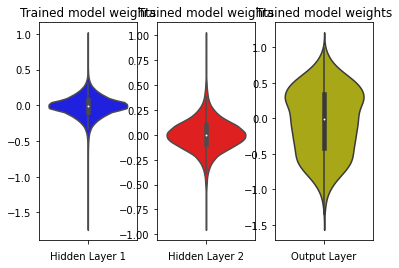

In [ ]:
W_after=model_sigmoid.get_weights()

h1_w=W_after[0].flatten().reshape(-1,1)
h2_w=W_after[2].flatten().reshape(-1,1)
out_w=W_after[4].flatten().reshape(-1,1)

fig=plt.figure()
plt.title("Weight Matrices After Model Trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y=h1_w,color="b")
plt.xlabel("Hidden Layer 1")

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y=h2_w,color="r")
plt.xlabel("Hidden Layer 2")

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")

<h2> MLP+ReLU+SGD </h2>

In [ ]:
model_relu=Sequential()
model_relu.add(Dense(512,activation="relu",input_shape=(input_dim,)))
model_relu.add(Dense(128,activation="relu"))
model_relu.add(Dense(output_dim,activation="softmax"))

model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_relu.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
history_relu=model_relu.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 1.5205 - accuracy: 0.5867 - val_loss: 0.5037 - val_accuracy: 0.8772
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4677 - accuracy: 0.8834 - val_loss: 0.3607 - val_accuracy: 0.9044
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3601 - accuracy: 0.9024 - val_loss: 0.3114 - val_accuracy: 0.9142
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3127 - accuracy: 0.9136 - val_loss: 0.2855 - val_accuracy: 0.9199
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.2852 - accuracy: 0.9196 - val_loss: 0.2647 - val_accuracy: 0.9263
Epoch 6/20
469/469 [==============================] - 4s 10ms/step - loss: 0.2698 - accuracy: 0.9222 - val_loss: 0.2503 - val_accuracy: 0.9295
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2525 - accuracy: 0.9280 - val_loss: 0.2373 - val_accuracy: 0.9340
Ep

Test Score 0.14969703555107117
Test Accuracy 0.9549999833106995


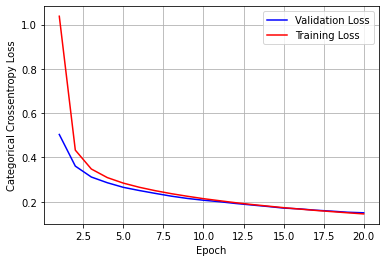

In [ ]:
score_relu=model_relu.evaluate(X_test,Y_test,verbose=0)
print("Test Score",score_relu[0])
print("Test Accuracy",score_relu[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Categorical Crossentropy Loss")
x=list(range(1,epoch+1))

vy=history_relu.history["val_loss"]
ty=history_relu.history["loss"]
plot_dynamic(x,vy,ty,ax)

Text(0.5, 0, 'Output Layer')

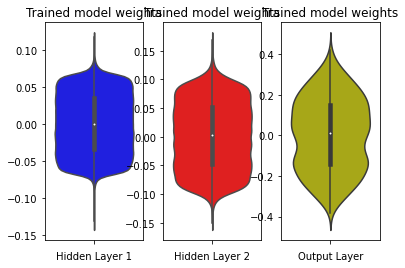

In [ ]:
W_after=model_relu.get_weights()

h1_w=W_after[0].flatten().reshape(-1,1)
h2_w=W_after[2].flatten().reshape(-1,1)
out_w=W_after[4].flatten().reshape(-1,1)

fig=plt.figure()
plt.title("Weight Matrices After Model Trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y=h1_w,color="b")
plt.xlabel("Hidden Layer 1")

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y=h2_w,color="r")
plt.xlabel("Hidden Layer 2")

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")

<h2> MLP+ReLU+ADAM </h2>

In [ ]:
model_relu.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_relu_adam=model_relu.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1555 - accuracy: 0.9526 - val_loss: 0.0930 - val_accuracy: 0.9698
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0736 - accuracy: 0.9780 - val_loss: 0.0717 - val_accuracy: 0.9769
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.0753 - val_accuracy: 0.9765
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0314 - accuracy: 0.9894 - val_loss: 0.0630 - val_accuracy: 0.9800
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0689 - val_accuracy: 0.9794
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0777 - val_accuracy: 0.9786
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0686 - val_accuracy: 0.9797

Test Score 0.09081750363111496
Test Accuracy 0.9818999767303467


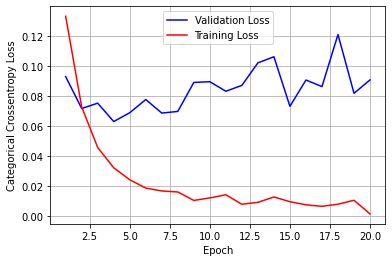

In [ ]:
score_relu_adam=model_relu.evaluate(X_test,Y_test,verbose=0)
print("Test Score",score_relu_adam[0])
print("Test Accuracy",score_relu_adam[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Categorical Crossentropy Loss")
x=list(range(1,epoch+1))

vy=history_relu_adam.history["val_loss"]
ty=history_relu_adam.history["loss"]
plot_dynamic(x,vy,ty,ax)

Text(0.5, 0, 'Output Layer')

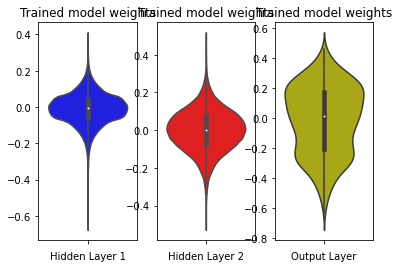

In [ ]:
W_after=model_relu.get_weights()

h1_w=W_after[0].flatten().reshape(-1,1)
h2_w=W_after[2].flatten().reshape(-1,1)
out_w=W_after[4].flatten().reshape(-1,1)

fig=plt.figure()
plt.title("Weight Matrices After Model Trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y=h1_w,color="b")
plt.xlabel("Hidden Layer 1")

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y=h2_w,color="r")
plt.xlabel("Hidden Layer 2")

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")

<h2> MLP+Batch Normalization + ADAM </h2>

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model_batch=Sequential()
model_batch.add(Dense(512,activation="sigmoid",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.039,seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128,activation="sigmoid",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.1,seed=None)))

model_batch.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [ ]:
model_batch.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_batch=model_batch.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3890 - accuracy: 0.8825 - val_loss: 0.2011 - val_accuracy: 0.9428
Epoch 2/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1576 - accuracy: 0.9550 - val_loss: 0.1354 - val_accuracy: 0.9602
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1056 - accuracy: 0.9690 - val_loss: 0.1074 - val_accuracy: 0.9675
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0773 - accuracy: 0.9776 - val_loss: 0.0909 - val_accuracy: 0.9713
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0791 - val_accuracy: 0.9750
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0859 - val_accuracy: 0.9745
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0350 - accuracy: 0.9899 - val_loss: 0.0779 - val_accuracy: 0.9764

Test Score 0.08425461500883102
Test Accuracy 0.9793000221252441


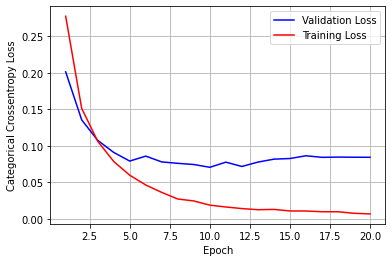

In [ ]:
score_batch=model_batch.evaluate(X_test,Y_test,verbose=0)
print("Test Score",score_batch[0])
print("Test Accuracy",score_batch[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Categorical Crossentropy Loss")
x=list(range(1,epoch+1))

vy=history_batch.history["val_loss"]
ty=history_batch.history["loss"]
plot_dynamic(x,vy,ty,ax)

Text(0.5, 0, 'Output Layer')

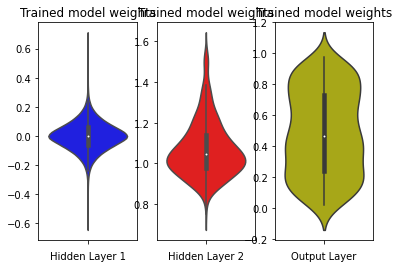

In [ ]:
W_after=model_batch.get_weights()

h1_w=W_after[0].flatten().reshape(-1,1)
h2_w=W_after[2].flatten().reshape(-1,1)
out_w=W_after[4].flatten().reshape(-1,1)

fig=plt.figure()
plt.title("Weight Matrices After Model Trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y=h1_w,color="b")
plt.xlabel("Hidden Layer 1")

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y=h2_w,color="r")
plt.xlabel("Hidden Layer 2")

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")

<h2> MLP + Dropout + Adam </h2>

In [ ]:
from tensorflow.keras.layers import Dropout
model_drop=Sequential()
model_drop.add(Dense(512,activation="relu",input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.039,seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128,activation="relu",kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.1,seed=None)))

model_drop.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

In [ ]:
model_drop.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model_drop_history=model_drop.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.6347 - accuracy: 0.8071 - val_loss: 0.1363 - val_accuracy: 0.9583
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2015 - accuracy: 0.9397 - val_loss: 0.0969 - val_accuracy: 0.9709
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1538 - accuracy: 0.9540 - val_loss: 0.0915 - val_accuracy: 0.9710
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1324 - accuracy: 0.9596 - val_loss: 0.0760 - val_accuracy: 0.9751
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1159 - accuracy: 0.9652 - val_loss: 0.0722 - val_accuracy: 0.9784
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0999 - accuracy: 0.9686 - val_loss: 0.0683 - val_accuracy: 0.9768
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0960 - accuracy: 0.9707 - val_loss: 0.0688 - val_accuracy: 0.9791

Test Score 0.054729681462049484
Test Accuracy 0.9843999743461609


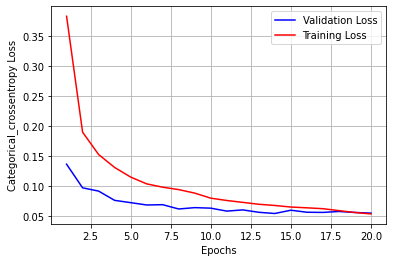

In [ ]:
model_drop_score=model_drop.evaluate(X_test,Y_test,verbose=0)
print("Test Score",model_drop_score[0])
print("Test Accuracy",model_drop_score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epochs")
ax.set_ylabel("Categorical_crossentropy Loss")

x=list(range(1,epoch+1))

vy=model_drop_history.history["val_loss"]
ty=model_drop_history.history["loss"]
plot_dynamic(x,vy,ty,ax)

Text(0.5, 0, 'Output Layer')

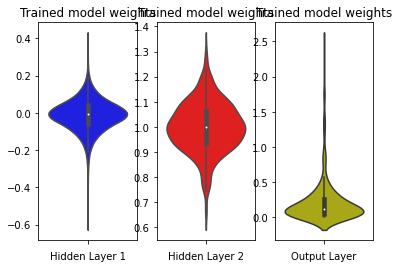

In [ ]:
W_after=model_drop.get_weights()

h1_w=W_after[0].flatten().reshape(-1,1)
h2_w=W_after[2].flatten().reshape(-1,1)
out_w=W_after[4].flatten().reshape(-1,1)

fig=plt.figure()
plt.title("Weight Matrices After Model Trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y=h1_w,color="b")
plt.xlabel("Hidden Layer 1")

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y=h2_w,color="r")
plt.xlabel("Hidden Layer 2")

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y=out_w,color="y")
plt.xlabel("Output Layer")

<h2> Hyperparameter Optimization </h2>

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(activ):
  model=Sequential()
  model.add(Dense(512,activation=activ,input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.039,seed=None)))

  model.add(Dense(128,activation=activ,kernel_initializer=RandomNormal(mean=0.0,stddev=0.05)))

  model.add(Dense(output_dim,activation="softmax",kernel_initializer=RandomNormal(mean=0.0,stddev=0.1,seed=None)))

  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

  return model

model=KerasClassifier(build_fn=create_model,batch_size=batch_size,epochs=epoch,verbose=0)

param_grid={"activ":["relu","sigmoid"]}
grid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=3)
grid_result=grid.fit(X_train,Y_train)
  

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(grid_result.best_score_)
print(grid_result.best_params_)

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]

for mean,std,param in zip(means,stds,params):
  print("%f (%f) with: %r" %(mean,std,param))

0.9748166600863138
{'activ': 'relu'}
0.974817 (0.002023) with: {'activ': 'relu'}
0.973850 (0.000797) with: {'activ': 'sigmoid'}
